In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df=pd.read_csv('OaklandAirport.csv')

In [8]:
df.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT03,WT04,WT05,WT08,WT09
0,USW00094817,"PONTIAC OAKLAND CO INTERNATIONAL AIRPORT, MI US",2019-01-01,9.40,12,0.01,NaN,36.0,23.0,290,290,21.0,25.1,1.0,NaN,NaN,NaN,NaN,NaN
1,USW00094817,"PONTIAC OAKLAND CO INTERNATIONAL AIRPORT, MI US",2019-01-02,7.61,2153,0.00,NaN,33.0,23.0,270,260,18.1,23.9,1.0,NaN,NaN,NaN,NaN,NaN
2,USW00094817,"PONTIAC OAKLAND CO INTERNATIONAL AIRPORT, MI US",2019-01-03,10.51,201,0.00,NaN,36.0,29.0,270,270,21.9,29.1,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00094817,"PONTIAC OAKLAND CO INTERNATIONAL AIRPORT, MI US",2019-01-04,4.92,1409,0.00,NaN,50.0,28.0,230,240,13.0,16.1,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094817,"PONTIAC OAKLAND CO INTERNATIONAL AIRPORT, MI US",2019-01-05,7.16,2137,0.00,NaN,48.0,26.0,290,300,28.0,32.0,1.0,NaN,NaN,NaN,NaN,NaN


In [9]:
weather=df[['PRCP','TAVG','TMAX','TMIN']]

In [10]:
weather.drop('TAVG',axis=1)

,PRCP,TMAX,TMIN
0,0.01,36.0,23.0
1,0.00,33.0,23.0
2,0.00,36.0,29.0
3,0.00,50.0,28.0
4,0.00,48.0,26.0
...,...,...,...
1379,0.02,74.0,42.0
1380,0.09,70.0,50.0
1381,0.02,54.0,40.0
1382,0.00,57.0,36.0


In [11]:
weather=weather.reset_index(drop=True)

In [12]:
weather

,PRCP,TAVG,TMAX,TMIN
0,0.01,NaN,36.0,23.0
1,0.00,NaN,33.0,23.0
2,0.00,NaN,36.0,29.0
3,0.00,NaN,50.0,28.0
4,0.00,NaN,48.0,26.0
...,...,...,...,...
1379,0.02,NaN,74.0,42.0
1380,0.09,NaN,70.0,50.0
1381,0.02,NaN,54.0,40.0
1382,0.00,NaN,57.0,36.0


In [13]:
weather=weather.drop('TAVG',axis=1)

In [14]:
weather.columns=['Precip','Temp_Max','Temp_Min']

In [15]:
weather

,Precip,Temp_Max,Temp_Min
0,0.01,36.0,23.0
1,0.00,33.0,23.0
2,0.00,36.0,29.0
3,0.00,50.0,28.0
4,0.00,48.0,26.0
...,...,...,...
1379,0.02,74.0,42.0
1380,0.09,70.0,50.0
1381,0.02,54.0,40.0
1382,0.00,57.0,36.0


In [16]:
weather=weather.fillna(weather.mean())

In [17]:
weather.isnull

<bound method DataFrame.isnull of       Precip  Temp_Max  Temp_Min
0       0.01      36.0      23.0
1       0.00      33.0      23.0
2       0.00      36.0      29.0
3       0.00      50.0      28.0
4       0.00      48.0      26.0
...      ...       ...       ...
1379    0.02      74.0      42.0
1380    0.09      70.0      50.0
1381    0.02      54.0      40.0
1382    0.00      57.0      36.0
1383    0.05      54.0      40.0

[1384 rows x 3 columns]>

In [18]:
X=weather.drop('Temp_Max',axis=1)
y=weather['Temp_Max']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
X_train.shape

(968, 2)

In [23]:
y_train.shape

(968,)

In [24]:
X_test.shape

(416, 2)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr=LinearRegression()

In [29]:
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
lr.intercept_

16.054089527261738

In [31]:
lr.coef_

array([-5.16532236,  1.06082721])

In [32]:
X_train.columns

Index(['Precip', 'Temp_Min'], dtype='object')

AttributeError: 'Series' object has no attribute 'columns'

In [35]:
max_temp=pd.DataFrame(weather['Temp_Max'])

In [38]:
type(max_temp)

pandas.core.frame.DataFrame

In [39]:
type(y_train)

pandas.core.series.Series

In [40]:
type(X_train)

pandas.core.frame.DataFrame

In [41]:
y_train=pd.DataFrame(y_train)

In [42]:
type(y_test)

pandas.core.series.Series

In [43]:
y_test=pd.DataFrame(y_test)

In [44]:
lr.fit(X_train,y_train)

LinearRegression()

In [46]:
predictions=lr.predict(X_test)

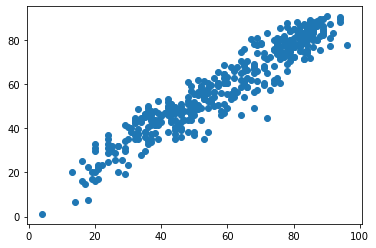

In [47]:
plt.scatter(y_test,predictions)

In [48]:
from sklearn import metrics

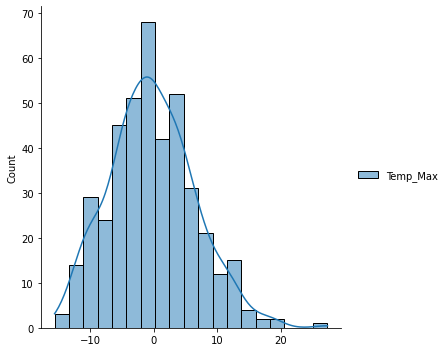

In [50]:
sns.displot(y_test-predictions,kde=True)

In [51]:
metrics.mean_absolute_error(y_test,predictions)

5.2881901416535735

In [52]:
metrics.mean_squared_error(y_test,predictions)

44.639140485329456

In [55]:
from plotly import __version__

In [56]:
print(__version__)

5.6.0


In [57]:
import cufflinks as cf

In [58]:
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

In [59]:
init_notebook_mode(connected=True)

In [60]:
cf.go_offline()

In [61]:
weather.iplot()

In [62]:
weather.iplot(kind='surface')